In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

(480, 400)


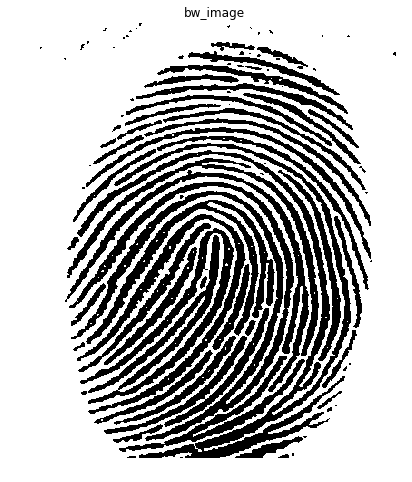

In [2]:
img = cv2.imread('../images/img.jpg',0)

[h,w] = img.shape
img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img > 100] = 255
print (img_bw.shape)
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("bw_image")
plt.imshow(img_bw,cmap='gray')

In [3]:
import math
def hit_miss(img,mask):
    
    [rows,cols] = img.shape
    
    out_img = img.copy()
    
   # out_img = 255* np.zeros([rows,cols],dtype='float')
    
    mask_1d = np.ravel(mask)
    window_size = mask.shape
    
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    #print (PadM,PadN)
    pad_img = np.pad(img,[PadM,PadN],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    #print (pad_img.shape)
    
    for i in range(PadM,rows1-PadM):
        for j in range(PadN,cols1-PadN):
            
            # get the PadMxPadN windows
            # get the PadMxPadN windows
            if (window_size[0] % 2 == 0):
                window = pad_img[i-PadM:i+PadM,j-PadN:j+PadN]
            else:    
                
                window = pad_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1]
                
            window_1d = np.ravel(window)
            
            #if(((window==mask1).all())|((window==mask2).all())):
                
            #    out_img[i-PadM,j-PadN] = 255
            #
            
            flag = True
            for n in range(window_size[0]*window_size[1]):
                if(mask_1d[n] != -1):
                    #print(mask_1d[n])
                    if(mask_1d[n]!=window_1d[n]):
                        
                        flag = False

            if(flag):
                out_img[i-PadM,j-PadN] = 0
                #print("nitin")
            #else:
            #    out_img[i-PadM,j-PadN] = 0
                
    return out_img  

In [4]:
#mask = np.array([[0,0,0],[-1,255.0,-1],[255.0,255.0,255.0]])
#np.ravel(mask)

In [5]:
def skeltanization(img_bw):

    S1_0 = np.array([[0,0,0],[-1,255.0,-1],[255.0,255.0,255.0]])

    S2_0 = np.array([[-1,0,0],[255.0,255.0,0],[-1,255.0,-1]])

    S1_90 = np.rot90(S1_0,1)

    S2_90 = np.rot90(S2_0,1)

    S1_180 = np.rot90(S1_0,2)

    S2_180 = np.rot90(S2_0,2)

    S1_270 = np.rot90(S1_0,3)

    S2_270 = np.rot90(S2_0,3)

    I1 = hit_miss(img_bw,S1_0)
    I2 = hit_miss(I1,S2_0)

    I3 = hit_miss(I2,S1_90)
    I4 = hit_miss(I3,S2_90)

    I5 = hit_miss(I4,S1_180)
    I6 = hit_miss(I5,S2_180)

    I7 = hit_miss(I6,S1_270)
    I8 = hit_miss(I7,S2_270)
    
    return I8


In [6]:
def iterate_skeltenization(img_bw):

    flag1 = True
    count = 0
    while (flag1):
        count = count+1
        I8 = skeltanization(img_bw)
        #print(count)
        if ((img_bw==I8).all()):
            flag1 = False
            break

        else:
            flag1 = True
            img_bw = I8.copy()
    return I8
    

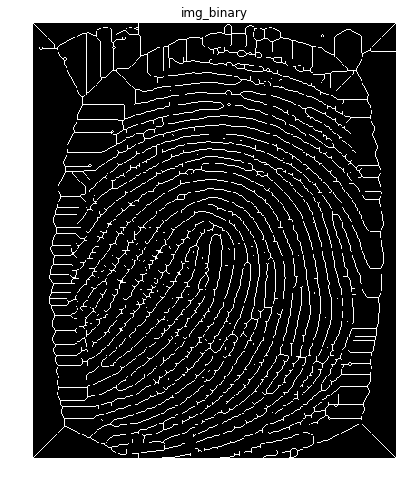

In [7]:
skeltone_img = iterate_skeltenization(img_bw)

fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("img_binary")
plt.imshow(skeltone_img,cmap='gray')

### Answer1.2

Structuring element S1 and S3 is used to perform the the thinning operation at triple junction for 0 degree, 90 degree, 180 degree and 270 degree.

### Answer 1.3 

Multiple pass of S1 and S2 required as each pass we are performing thinning and we stop if operation S1 and S2 stop changing the input image.



In [8]:
## Answer1.4
#apply function iterate_skeltenization(img_bw) for diffrent images 


## Answer 1.4 pending 
apply function iterate_skeltenization(img_bw) for diffrent images 

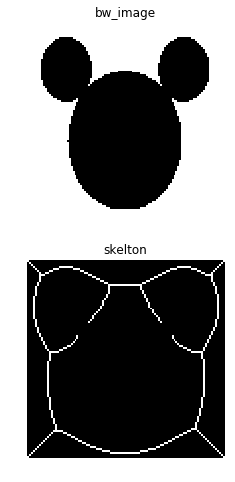

In [9]:
img = cv2.imread('../images/solid_shape1.png',0)
img = cv2.resize(img,(100,100))
[h,w] = img.shape

img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img < 100] = 255

skeltone_img = iterate_skeltenization(img_bw)
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("bw_image")
plt.imshow(img_bw,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("skelton")
plt.imshow(skeltone_img,cmap='gray')

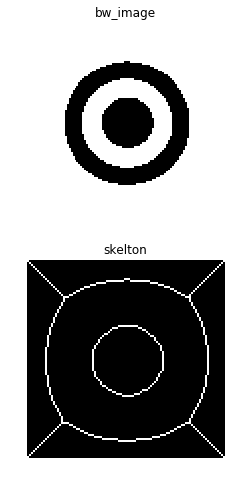

In [10]:
img = cv2.imread('../images/with_holes.png',0)
img = cv2.resize(img,(100,100))
[h,w] = img.shape

img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img < 100] = 255

skeltone_img = iterate_skeltenization(img_bw)
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("bw_image")
plt.imshow(img_bw,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("skelton")
plt.imshow(skeltone_img,cmap='gray')

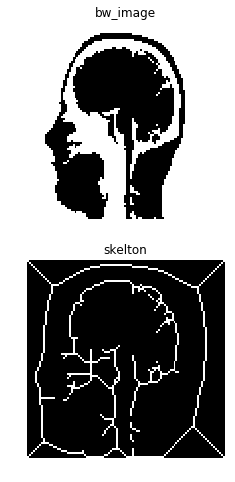

In [11]:
img = cv2.imread('../images/irregula_shape.png',0)
img = cv2.resize(img,(100,100))
[h,w] = img.shape

img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img < 100] = 255

skeltone_img = iterate_skeltenization(img_bw)
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("bw_image")
plt.imshow(img_bw,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("skelton")
plt.imshow(skeltone_img,cmap='gray')

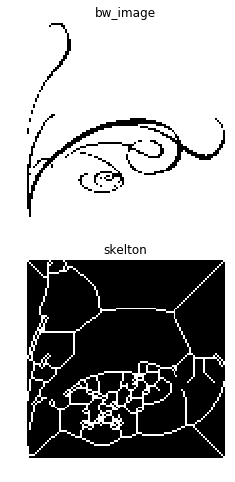

In [12]:
img = cv2.imread('../images/thin_object.png',0)
img = cv2.resize(img,(100,100))

[h,w] = img.shape

img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img > 100] = 255

skeltone_img = iterate_skeltenization(img_bw)
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("bw_image")
plt.imshow(img_bw,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("skelton")
plt.imshow(skeltone_img,cmap='gray')

In [13]:
#answer2.2

import math
def erosion(img,mask):
    
    [rows,cols] = img.shape
    
    #out_img = img.copy()
    
    out_img = np.zeros([rows,cols],dtype='float')
    
    mask_1d = np.ravel(mask)
    window_size = mask.shape
    
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    #print (PadM,PadN)
    pad_img = np.pad(img,[PadM,PadN],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    #print (pad_img.shape)
    
    for i in range(PadM,rows1-PadM):
        for j in range(PadN,cols1-PadN):
            
            # get the PadMxPadN windows
            # get the PadMxPadN windows
            if (window_size[0] % 2 == 0):
                window = pad_img[i-PadM:i+PadM,j-PadN:j+PadN]
            else:    
                
                window = pad_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1]
                
            K=np.where(mask==255)
            #print(K)
            if((window[K]==255).all()):
                
                out_img[i-PadM,j-PadN] = 255
                
    return out_img  
    
    
    

In [14]:
import math
def dilation(img,mask):
    
    [rows,cols] = img.shape
    
    #out_img = img.copy()
    
    out_img = np.zeros([rows,cols],dtype='float')
    
    mask_1d = np.ravel(mask)
    window_size = mask.shape
    
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    #print (PadM,PadN)
    pad_img = np.pad(img,[PadM,PadN],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    #print (pad_img.shape)
    
    for i in range(PadM,rows1-PadM):
        for j in range(PadN,cols1-PadN):
            
            # get the PadMxPadN windows
            # get the PadMxPadN windows
            if (window_size[0] % 2 == 0):
                window = pad_img[i-PadM:i+PadM,j-PadN:j+PadN]
            else:    
                
                window = pad_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1]
                
            window_1d = np.ravel(window)
            
            flag = False
            for n in range(window_size[0]*window_size[1]):
                if(mask_1d[n] != 0):
                    #print(mask_1d[n])
                    if(mask_1d[n]==window_1d[n]):
                        
                        flag = True

            if(flag):
                out_img[i-PadM,j-PadN] = 255
                #print("nitin")
            #else:
            #    out_img[i-PadM,j-PadN] = 0
                
    return out_img  
    

In [15]:
def circular_mask(n,r,center):
    a = center
    b = center
    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x*x + y*y <= r*r

    array = np.zeros((n, n))
    array[mask] = 255
    
    return array

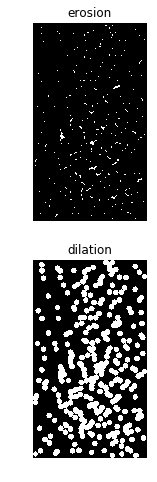

In [16]:

img = cv2.imread('../images/coin_image.jpg',0)
[h,w] = img.shape
img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img > 100] = 255

#mask1 = 255*np.ones([10,10])
mask = circular_mask(19,9,9)
erode_img = erosion(img_bw,mask)

dilate_img = dilation(erode_img,mask)

#kernel = np.ones((10,10), np.uint8) 

#img_erosion = cv2.erode(img_bw, kernel, iterations=1)



fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("erosion")
plt.imshow(erode_img,cmap='gray')

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("dilation")
plt.imshow(dilate_img,cmap='gray')




## Answer 2 

In [17]:
def four_connectivity(img,out_img1, i,j,label):

    label_tree = [-1, -1]  ## dummy values
    flag = False
    if((img[i-1,j] ==255) & (img[i,j-1] ==255)) :    ## if upside and left side labeled assign select minimum label
        
        label1 = out_img1[i-1,j]
        label2 = out_img1[i,j-1]
        
        if(label1 == label2):                     ## if both label are same
            out_img1[i,j] = label1     
            
        elif(label1 < label2):              ## if label1 < label2 assign label1 to pixel and save parents child tree
            flag = True
            out_img1[i,j] = label1
            
            label_tree = [label1,label2]
        else:                              ## if label2 < label1 assign label2 to pixel and save parents child tree     
            flag = True
            out_img1[i,j] = label2
            label_tree = [label2,label1]
        
    elif(img[i-1,j]==255):         ## if upside side labeled assigned, select label and ssign to current pixel
        label1 = out_img1[i-1,j]
        out_img1[i,j] = label1
        
    elif(img[i,j-1]==255):             ## if right side labeled assigned, select label and assign to current pixel
        label2 = out_img1[i,j-1]
        out_img1[i,j] = label2
    ## assign new label    
    else:
        #print(i,j,label)
        out_img1[i,j] = label            ## assign new label to pixel         
        label = label +1
    return  out_img1, flag, label, label_tree     ## only save the label tree if flag ture 
        
        
    

In [18]:
def unique_tree(tree,label_tree):
    
    if tree:              ## if tree is not empty
        flag1 = True
        for element in tree:
            
            if (element ==label_tree):  ## check if label tree is there  dont append
                flag1 = False
        if(flag1):
            
            tree.append(label_tree)
    else:
        tree.append(label_tree)
    
    return tree

In [19]:
def iterate_pass(pad_img,out_img,tree):
    
    [rows1,cols1] = pad_img.shape
    out_img1 = out_img.copy()
    count=0
    tree1 = np.asarray(tree)
    flag1 = True
    while (flag1):
            count = count+1
            for i in range(1,rows1-1):                  ## iterate in image
                for j in range(1,cols1-1):              ## iterate in image
                    if(pad_img[i,j]==255):              ## check if value is valid either 255
                        
                        label1 = out_img[i,j]            ## get the label from first pass
                       
                        K = np.where(tree1[:,1]==label1)   ## check if label have and child parents relation 
                        #print(K)
                        if(K[0].any()):                     ## if lable is already there in tree           
                            parents_value = tree1[K,0]      ## find the parents for a child label ( they might be more than one)
                            value = np.min(parents_value)  ## select the minimum parents label value
                            out_img1[i,j] = value           ## and assign parent label with minimum value  
                        else:
                            out_img1[i,j] = label1           ## else assign the label
                        
            if((out_img1==out_img).all()):                 ## if there is no change in iteration stop the while loop
                flag1 = False
            else:
                out_img = out_img1.copy()                   ## else assign continue iteration 
            #print(count)    
    return out_img1        
                        
    
       
    

In [20]:
## ansewr 4 Disecription therotical


def connected_component(img):
    
    [rows,cols] = img.shape
    
    #out_img = img.copy()
    
    #out_img = np.zeros([rows,cols],dtype='float')
    PadM = 1
    PadN = 1
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    #print (PadM,PadN)
    pad_img = np.pad(img,[1,1],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    out_img1 = np.zeros([rows1,cols1],dtype='float')
    #print (pad_img.shape)
    
    Label = 1
    
    tree = []
    ### first pass
    
    for i in range(PadM,rows1-PadM):
        for j in range(PadN,cols1-PadN):
            if(pad_img[i,j]==255):
                out_img2, flag, Label, label_tree = four_connectivity(pad_img,out_img1, i,j,Label)
                if(flag):
                    tree =  unique_tree(tree,label_tree)
                    

 ## 
    out_img3 = iterate_pass(pad_img,out_img2,tree)


    return out_img3[1:-1,1:-1]        ## return withot padding    
            
            
            
            
            


### answer 2.1

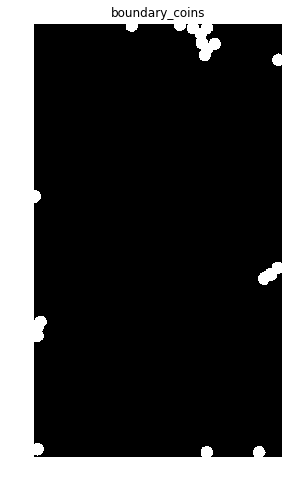

In [21]:
## boundary connected points

img = cv2.imread('../images/coin_image.jpg',0)

[h,w] = img.shape
img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img > 10] = 255

img_bw[0,:] = 255
img_bw[-1,:]  = 255
img_bw[:,0] = 255
img_bw[:,-1]  = 255

out_img3= connected_component(img_bw)

boundary_coins = np.zeros([h,w],dtype ='uint8')
boundary_coins[out_img3==1]=255

fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("boundary_coins")
plt.imshow(boundary_coins,cmap = 'gray')


In [22]:
def histogram_1(img_gray,number_of_bins,Norm):
    # initilizing the histogram bins
    histo = np.zeros([1,number_of_bins], dtype='int32')
    
    [row,col] = img_gray.shape
    
    for i in range(0,row):
        for j in range(0,col):
            value = int(img_gray[i,j])
            if(value!=0):
                
                ## taking care the value accoring to bins
                #value = int(round(value*(number_of_bins-1)/255))
                #print (value)
                histo[0,value] = histo[0,value]+1
    
    if(Norm==True):
        ## normalizing the histogram 
        histo = histo/((1.0)*row*col)
    
    
    return histo  

### answer 2.2

In [23]:
## coin which are selected

img = cv2.imread('../images/coin_image.jpg',0)

[h,w] = img.shape
img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img > 100] = 255

out_img3= connected_component(img_bw)




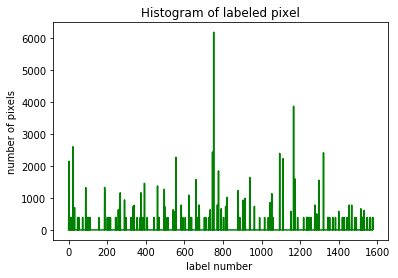

In [24]:

n_bins = int(np.max(np.max(out_img3)))

histo = histogram_1(out_img3,n_bins+1,False)
plt.title("Histogram of labeled pixel")
plt.xlabel("label number ")
plt.ylabel("number of pixels")
plt.plot(histo[0,:],'g')
plt.show()

## select the index value which are less than 410 


    
    
        
#circle_labled


## calculate the histogram
#print(histo)

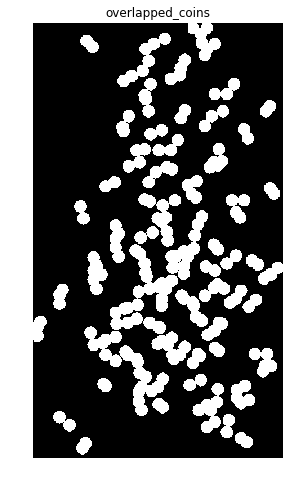

In [25]:
circle_labled = []

for j in range(1,n_bins+1):
    if (histo[0,j] > 420):
        
        circle_labled.append(j)

overlapped_coins = np.zeros([h,w],dtype ='uint8')


for label in circle_labled:
    overlapped_coins[out_img3==label]=255 
    
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("overlapped_coins")
plt.imshow(overlapped_coins,cmap = 'gray')    

### answer2.3

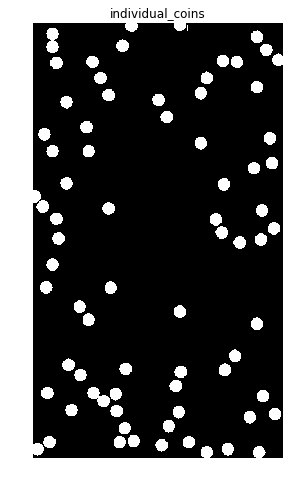

In [26]:
img = cv2.imread('../images/coin_image.jpg',0)

[h,w] = img.shape
img_bw = np.zeros([h,w],dtype ='uint8')

img_bw[img > 100] = 255

individual_coins = img_bw - overlapped_coins
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("individual_coins")
plt.imshow(individual_coins,cmap = 'gray')  

### answer3 

### answer 3.1

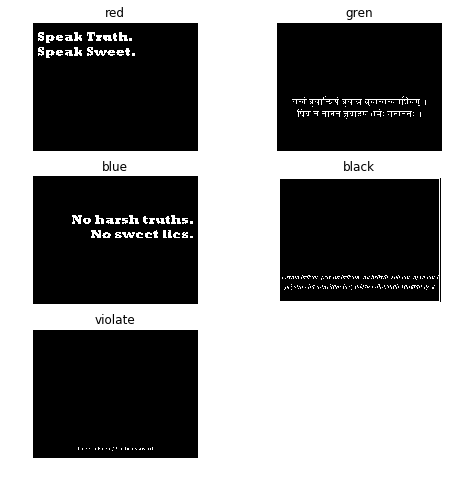

In [27]:
## answer3

img = cv2.imread('../images/text_component.png')

#img = np.zeros([row,col,c],dtype=float)


[row,col,c] = img.shape
img_b = np.zeros([row,col],dtype=float)
img_g = np.zeros([row,col],dtype=float)
img_r = np.zeros([row,col],dtype=float)
img_v = np.zeros([row,col],dtype=float)
img_black = np.zeros([row,col],dtype=float)
#get the pallete corol value we implemeneted the function in assignmnet 1

for i in range(row):
    for j in range(col):
        
        #for green 
        if(img[i,j,0] <150) & (img[i,j,1] > 150) & (img[i,j,2] <150):
            
            img_g[i,j] = 255
        #for blue    
        if(img[i,j,0] >100) & (img[i,j,1] < 100) & (img[i,j,2] <100):
            
            img_b[i,j] = 255 
        #for red    
        if(img[i,j,0] <100) & (img[i,j,1] < 100) & (img[i,j,2] >200):
            
            img_r[i,j] = 255  
            
        #for black    
        if(img[i,j,0] <100) & (img[i,j,1] < 100) & (img[i,j,2] <100):
            
            img_black[i,j] = 255  
            
        if(img[i,j,0] >150) & (img[i,j,1] < 100) & (img[i,j,2] > 100):
            
            img_v[i,j] = 255    


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 3
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("red")
plt.imshow(img_r,cmap = 'gray')  
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("gren")
plt.imshow(img_g,cmap = 'gray')  
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("blue")
plt.imshow(img_b,cmap = 'gray')  
fig.add_subplot(rows, columns, 4)
plt.axis("off")
plt.title("black")
plt.imshow(img_black,cmap = 'gray')  
fig.add_subplot(rows, columns, 5)
plt.axis("off")
plt.title("violate")
plt.imshow(img_v,cmap = 'gray')  

#img1[]

In [28]:
red_component= connected_component(img_r)
print("red connected_componenet", len(np.unique(np.ravel(red_component)))-1)
blue_component= connected_component(img_b)
print("blue connected_componenet", len(np.unique(np.ravel(blue_component)))-1)
g_component= connected_component(img_g)
print("green connected_componenet", len(np.unique(np.ravel(g_component)))-1)
black_component= connected_component(img_black)
print("black connected_componenet", len(np.unique(np.ravel(black_component)))-1)
v_component= connected_component(img_v)
print("violate connected_componenet", len(np.unique(np.ravel(v_component)))-1)


red connected_componenet 26
blue connected_componenet 29
green connected_componenet 123
black connected_componenet 348
violate connected_componenet 38


### Answer 4 pending

After Image: 
When We continue to look at some image for a long duration (50-60 seconds)and then look somewhere else a replica of same appears to us. this is reffered to as After Image Effect. 


Moire Pattern: 
When two similar opaque patterns are overlaid on each other then resultant pattern is reffered to as Moire pattern.

Structural coloration:
The process of the production of new colour by mixing of existing pigments present in the the object is reffered to as Structural coloration .

### Answer5

In [29]:
# Answer5
HSI = np.zeros([100,100,3],dtype = 'float') 
HSI1 = np.zeros([100,100,3],dtype = 'float') 

RGB = np.zeros([100,100,3]) 
RGB1 = np.zeros([100,100,3]) 

HSI[:,:,1] = 1.0
HSI[:,:,2] = 1.0

HSI1[:,:,1] = 1.0
HSI1[:,:,2] = 1.0

value = 90.0
start = 0
for i in range(10):
    
    #HSI[:,start:start+10,0] = int(255*(value/360.0))
    HSI[:,start:start+10,0] = 2*np.pi*(value/360.0)
    value = value+18
    start = start+10
    
value1 = 90.0
start1 = 0
for j in range(10):
    #HSI1[:,start1:start1+10,0] = value1/360.0
    HSI1[:,start1:start1+10,0] = 2*np.pi*(value1/360.0)
    value1 = value1+29 - j*3
    start1 = start1+10
    

In [30]:
def HSV2RGB (H,S,V):

    if ( S == 0 ):
        R = V * 255
        G = V * 255
        B = V * 255
        return R,G,B
    else:

        var_h = H * 6
        
       
        if ( var_h == 6 ):
            var_h = 0 
            
        var_i = int( var_h )             
        var_1 = V * ( 1 - S )
        var_2 = V * ( 1 - S * ( var_h - var_i ) )
        var_3 = V * ( 1 - S * ( 1 - ( var_h - var_i ) ) )

        if( var_i == 0 ):
                
            var_r = V     
            var_g = var_3 
            var_b = var_1 
        elif ( var_i == 1 ):
            var_r = var_2 
            var_g = V     
            var_b = var_1
        elif ( var_i == 2 ):
            var_r = var_1
            var_g = V     
            var_b = var_3
        elif ( var_i == 3 ):
            var_r = var_1
            var_g = var_2
            var_b = V     
        elif ( var_i == 4 ):
            var_r = var_3
            var_g = var_1
            var_b = V     
        else:
            var_r = V
            var_g = var_1
            var_b = var_2 

        R = var_r * 255
        G = var_g * 255
        B = var_b * 255
        
        
        return R,G,B


In [31]:
def hsvtorgb(h,s,v):      ## h is 0 to 2p , s =2/3 amd V = 4/3
    
    r=v*(1+s*(math.cos(h)-1))
    g=v*(1+s*(math.cos(h-2.09439)-1))
    b=v*(1+s*(math.cos(h+2.09439)-1))
    return r,g,b
   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


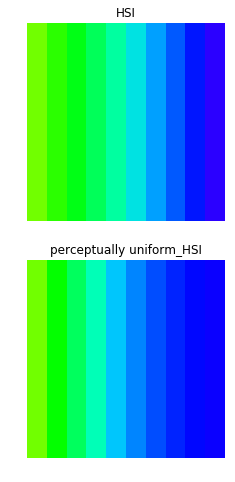

In [32]:

for i in range(100):
    for j in range(100):
        RGB[i,j,0],RGB[i,j,1],RGB[i,j,2] = hsvtorgb(HSI[i,j,0],2/3,4/3)
        RGB1[i,j,0],RGB1[i,j,1],RGB1[i,j,2] = hsvtorgb(HSI1[i,j,0],2/3,4/3)
        #RGB[i,j,0],RGB[i,j,1],RGB[i,j,2] = HSV2RGB(HSI[i,j,0],HSI[i,j,1],HSI[i,j,2])
        #RGB1[i,j,2],RGB1[i,j,1],RGB1[i,j,0] = HSV2RGB(HSI1[i,j,0],1,1)

#rgbimg = cv2.cvtColor(HSI, cv2.COLOR_HSV2RGB)
#rgbimg1 = cv2.cvtColor(HSI1, cv2.COLOR_HSV2RGB)

fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("HSI")
plt.imshow(RGB) 
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("perceptually uniform_HSI")
plt.imshow(RGB1) 





## Answer 6

In [33]:
def RGB2disp(img):
    
    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]
    fig=plt.figure(figsize=(8, 8))
    columns = 3
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("R")
    plt.imshow(R,cmap='gray') 
    fig.add_subplot(rows, columns, 2)
    plt.axis("off")
    plt.title("G")
    plt.imshow(G,cmap='gray') 
    fig.add_subplot(rows, columns, 3)
    plt.axis("off")
    plt.title("B")
    plt.imshow(B,cmap='gray')     


In [34]:
def RGB2CMY(img):
    
    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]
    
    C = 255 - R
    M = 255 - G
    Y = 255 - B
    fig=plt.figure(figsize=(8, 8))
    columns = 3
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("C")
    plt.imshow(C,cmap='gray') 
    fig.add_subplot(rows, columns, 2)
    plt.axis("off")
    plt.title("M")
    plt.imshow(M,cmap='gray') 
    fig.add_subplot(rows, columns, 3)
    plt.axis("off")
    plt.title("Y")
    plt.imshow(Y,cmap='gray') 
    
    
    

In [35]:
def rgb2hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = df/mx
    v = mx
    return h, s, v

def RGB2HSV(img):
    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]
    H = R.copy()
    S = R.copy()
    V = R.copy()
    
    [row,col] = R.shape
    for i in range(row):
        for j in range(col):
            h , s , v = rgb2hsv(R[i,j], G[i,j], B[i,j])
            
            H[i,j] = int(255*(h/360))
            S[i,j] = int(255* s)
            V[i,j] = int(255*v)
                

    
   # H = (255*(H/360.0))
   # S = (255*S)
   # V = (255*V)
    fig=plt.figure(figsize=(8, 8))
    columns = 3
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("Hue")
    plt.imshow(H,cmap='gray') 
    fig.add_subplot(rows, columns, 2)
    plt.axis("off")
    plt.title("saturation")
    plt.imshow(S,cmap='gray') 
    fig.add_subplot(rows, columns, 3)
    plt.axis("off")
    plt.title("intensity")
    plt.imshow(V,cmap='gray')     


In [36]:
def rgb2lab ( inputColor ) :

    num = 0
    RGB = [0, 0, 0]

    for value in inputColor :
        value = float(value) / 255

        if value > 0.04045 :
               value = ( ( value + 0.055 ) / 1.055 ) ** 2.4
        else :
            value = value / 12.92

        RGB[num] = value * 100
        num = num + 1

    XYZ = [0, 0, 0,]

    X = RGB [0] * 0.4124 + RGB [1] * 0.3576 + RGB [2] * 0.1805
    Y = RGB [0] * 0.2126 + RGB [1] * 0.7152 + RGB [2] * 0.0722
    Z = RGB [0] * 0.0193 + RGB [1] * 0.1192 + RGB [2] * 0.9505
    XYZ[ 0 ] = round( X, 4 )
    XYZ[ 1 ] = round( Y, 4 )
    XYZ[ 2 ] = round( Z, 4 )

    XYZ[ 0 ] = float( XYZ[ 0 ] ) / 95.047         # ref_X =  95.047   Observer= 2°, Illuminant= D65
    XYZ[ 1 ] = float( XYZ[ 1 ] ) / 100.0          # ref_Y = 100.000
    XYZ[ 2 ] = float( XYZ[ 2 ] ) / 108.883        # ref_Z = 108.883

    num = 0
    for value in XYZ :

        if value > 0.008856 :
            value = value ** ( 0.3333333333333333 )
        else :
            value = ( 7.787 * value ) + ( 16 / 116 )

        XYZ[num] = value
        num = num + 1

    Lab = [0, 0, 0]

    L = ( 116 * XYZ[ 1 ] ) - 16
    a = 500 * ( XYZ[ 0 ] - XYZ[ 1 ] )
    b = 200 * ( XYZ[ 1 ] - XYZ[ 2 ] )

    Lab [ 0 ] = round( L, 4 )
    Lab [ 1 ] = round( a, 4 )
    Lab [ 2 ] = round( b, 4 )

    return Lab

In [37]:
def RGB2Lab(img):
    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]
    L = R.copy()
    A = R.copy()
    B = R.copy()
    
    [row,col] = R.shape
    for i in range(row):
        for j in range(col):
            Lab = rgb2lab([R[i,j], G[i,j], B[i,j]])
            L[i,j] = Lab[0]
            A[i,j] = Lab[1]
            B[i,j] = Lab[2]
            
    fig=plt.figure(figsize=(8, 8))
    columns = 3
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("L")
    plt.imshow(L,cmap='gray') 
    fig.add_subplot(rows, columns, 2)
    plt.axis("off")
    plt.title("a")
    plt.imshow(A,cmap='gray') 
    fig.add_subplot(rows, columns, 3)
    plt.axis("off")
    plt.title("b")
    plt.imshow(B,cmap='gray')      
            

### answer6.1

In [38]:
img1 = cv2.imread('../images/color_bars.tif')     # BGR channel
img2 = cv2.imread('../images/peppers_color.tif')     # BGR channel
img3 = cv2.imread('../images/mandril_color.tif')     # BGR channel


In [39]:
# plot RGB for theses images 

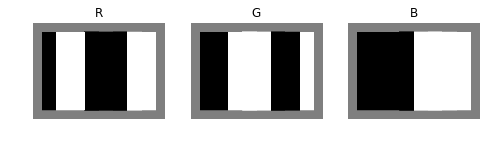

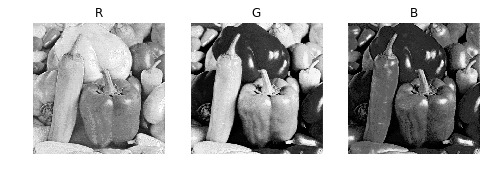

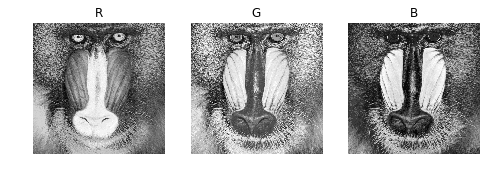

In [40]:
RGB2disp(img1)
RGB2disp(img2)
RGB2disp(img3)

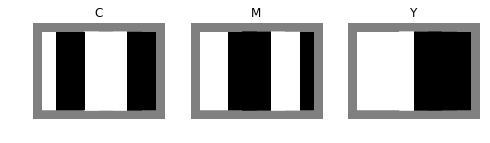

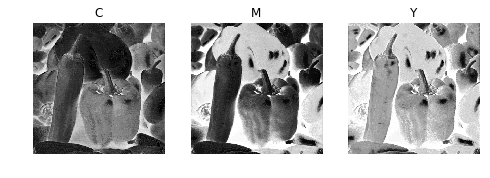

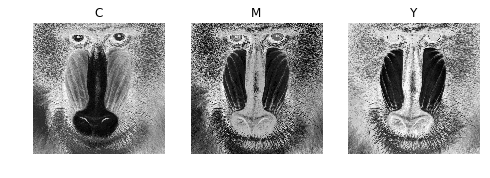

In [41]:
RGB2CMY(img1)
RGB2CMY(img2)
RGB2CMY(img3)

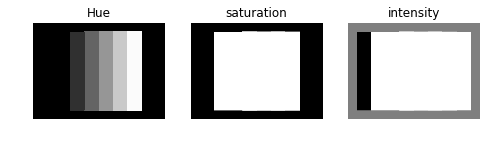

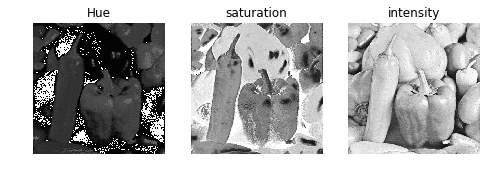

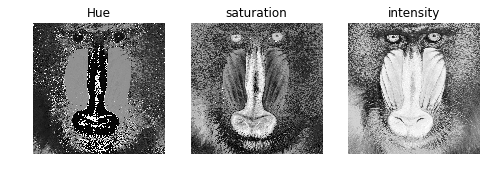

In [42]:
RGB2HSV(img1)
RGB2HSV(img2)
RGB2HSV(img3)

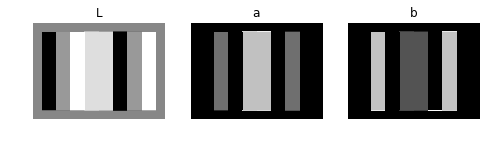

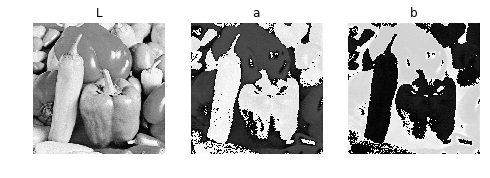

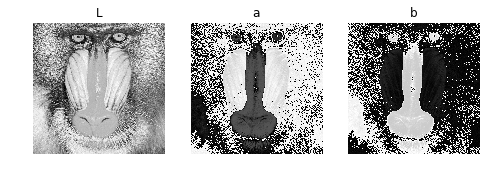

In [43]:
RGB2Lab(img1)
RGB2Lab(img2)
RGB2Lab(img3)

### Answer6.2 

In [44]:
def BitQuantizeImage(img_gray, k):
    [row,col] = img_gray.shape
    out_img = np.zeros([row,col],dtype='uint8')
    
    if((k >0 ) & (k < 9)):
        factor  = 2.0**k-1

        for i in range(0,row):
            for j in range(0,col):
                value = img_gray[i,j]
                ## taking care the value accoring to bins
                value = round(value*(factor/255.0))

                # change the value according to bits:

                value = int(round((value/factor)*255))

                out_img[i,j] = value
        return out_img          
    else:
        
        print("Error not a valid entry of k. k should be in between 1 to 8 ")
        return [] 

In [45]:
def RGB2safeRGB(img):
    out_img = img.copy()
    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]
    R1 = BitQuantizeImage(R, 3)    # reduced to two bit 
    G1 = BitQuantizeImage(G, 3)    # reduced to two bit     
    B1 = BitQuantizeImage(B, 3)    # 2 bit quantize
    out_img[:,:,0] = R1
    out_img[:,:,1] = G1
    out_img[:,:,2] = B1
    fig=plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("safe RGB")
    plt.imshow(out_img)     
    

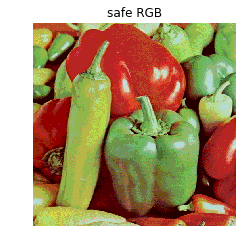

In [46]:
img2 = cv2.imread('../images/peppers_color.tif')     # BGR channel
RGB2safeRGB(img2)

In [47]:
def histogram_1(img_gray,number_of_bins,Norm):
    # initilizing the histogram bins
    histo = np.zeros([1,number_of_bins], dtype='int32')
    
    [row,col] = img_gray.shape
    
    for i in range(0,row):
        for j in range(0,col):
            value = img_gray[i,j]
            ## taking care the value accoring to bins
            value = int(round(value*(number_of_bins-1)/255))
            #print (value)
            histo[0,value] = histo[0,value]+1
    
    if(Norm==True):
        ## normalizing the histogram 
        histo = histo/((1.0)*row*col)
    
    
    return histo 

In [48]:
def hist_equa(img):
    [rows,cols] = img.shape
    
    out_img = np.zeros([rows,cols],dtype='int32')
    ## calculate the histogram from the function we implemented.
    histo = histogram_1(img,256,True)
    ## calculate the cdf of histogram 
    cdf = np.zeros([1,256], dtype='float')
    temp_cdf = 0
    
    for k in range(0,256):
        
        temp = histo[0,k]
        temp_cdf = temp_cdf+temp
        cdf[0,k] = temp_cdf
    
    
    #Area = rows*cols
    Dm = 255.0
    
    for i in range(rows):
        for j in range(cols):
            value = img[i,j]
            #out_img[i,j] = int((Dm/Area)*cdf[0,value])
            out_img[i,j] = int(Dm* cdf[0,value])
            
            
    
    
    return out_img


### Answer 6.3

In [49]:
def RGB2HSV1(img):
    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]
    H = R.copy()
    S = R.copy()
    V = R.copy()
    
    [row,col] = R.shape
    for i in range(row):
        for j in range(col):
            h , s , v = rgb2hsv(R[i,j], G[i,j], B[i,j])
            
            H[i,j] = int(255*(h/360))
            S[i,j] = int(255* s)
            V[i,j] = int(255*v)
                
    return H,S,V  

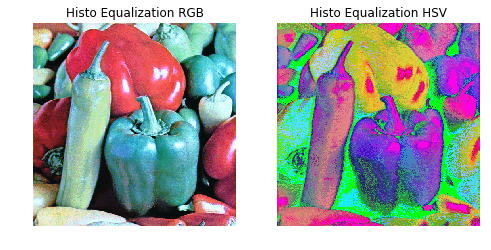

In [50]:
img2 = cv2.imread('../images/peppers_color.tif')     # BGR channel
RGB = img2.copy()
HSV = img2.copy()

R = img2[:,:,2]
G = img2[:,:,1]
B = img2[:,:,0]

H,S,V = RGB2HSV1(img2)

Req = hist_equa(R)
Geq = hist_equa(G)
Beq = hist_equa(B)

Heq = hist_equa(H)
Seq = hist_equa(S)
Veq = hist_equa(V)

RGB[:,:,2] = Beq
RGB[:,:,1] = Geq
RGB[:,:,0] = Req

HSV[:,:,2] = Heq
HSV[:,:,1] = Seq
HSV[:,:,0] = Veq
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Histo Equalization RGB")
plt.imshow(RGB)  
rows = 1
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Histo Equalization HSV")
plt.imshow(HSV)  



### Answer6.4

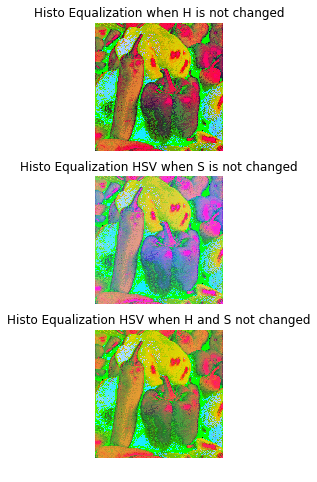

In [51]:
img2 = cv2.imread('../images/peppers_color.tif')     # BGR channel

HSV1 = img2.copy()
HSV2 = img2.copy()
HSV3 = img2.copy()
H,S,V = RGB2HSV1(img2)

Req = hist_equa(R)
Geq = hist_equa(G)
Beq = hist_equa(B)

Heq = hist_equa(H)
Seq = hist_equa(S)
Veq = hist_equa(V)

HSV1[:,:,2] = H
HSV1[:,:,1] = Seq
HSV1[:,:,0] = Veq

HSV2[:,:,2] = Heq
HSV2[:,:,1] = S
HSV2[:,:,0] = Veq

HSV3[:,:,2] = H
HSV3[:,:,1] = S
HSV3[:,:,0] = Veq

fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 3
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Histo Equalization when H is not changed")
plt.imshow(HSV1)

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Histo Equalization HSV when S is not changed")
plt.imshow(HSV2)  

fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("Histo Equalization HSV when H and S not changed")
plt.imshow(HSV3)  
